##Data Analysis Project - Agricultural Data Exploration.


##Introduction
Hi, I'm happy to hear that you're interested in the Maji Ndogo project! Allow me to explain our challenges and our approach to overcoming them.

We are working on a large-scale initiative to automate farming in Maji Ndogo, which has a variety of difficult agricultural environments. We must first determine the 'where' and 'what' of farming before delving into the 'how'. Making educated decisions about where to plant particular crops, taking into account variables like rainfall, soil type, climate, and many more, is more important than simply implementing technology.

The analytical process will entail methodically answering the research questions and using an organized method to dissect each one. This will entail using suitable statistical methods or algorithms and carrying out in-depth data examination. Clear, well-structured code will be used to conduct the analysis in order to guarantee openness, repeatability, and comprehension.

The foundation of this entire automation project is our analysis. We have a wide range of variables, including regional information, climate, and soil fertility. Knowing these factors allows us to suggest the ideal sites for certain crops. It's similar to completing a challenging puzzle in that every piece of information is essential to understanding the whole picture.

Lets get ready to explore!!!

We will first walk through the process of importing our dataframe from google drive.This is a crucial step as it sets the foundation for all our subsequent analyses.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Preview of the data

In [2]:
import os
import pandas as pd


file_path = '/content/drive/MyDrive/MD_agric_exam-4313.CSV'
df = pd.read_csv(file_path)

df.head()

,Field_ID,Elevation,Rainfall,Min_temperature_C,Max_temperature_C,pH,Pollution_level,Plot_size,Annual_yield,Crop_type
0,1162,494.95615,1507.6,-5.4,31.0,6.859436,0.007034,3.6,1.617421,coffee
1,5108,663.73390,581.0,-4.7,30.9,5.603219,0.289643,4.2,2.532497,potato
2,3504,396.87990,1715.1,-6.1,31.7,5.774116,0.000409,2.6,1.262207,banana
3,5351,594.80370,1748.0,-4.3,33.6,6.477415,0.088777,7.9,4.351564,wheat
4,905,609.49800,1395.8,-4.5,31.3,5.419586,0.050023,10.8,5.034791,cassava


Checking the data for any possible errors in readiness for data cleaning

In [3]:
#from types import CoroutineType
df.describe()

,Field_ID,Elevation,Rainfall,Min_temperature_C,Max_temperature_C,pH,Pollution_level,Plot_size,Annual_yield
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1.000000e+03,1000.000000,1000.000000
mean,2779.486000,628.136035,1197.734700,-4.504100,30.89460,5.603899,2.233740e-01,3.962400,2.101536
std,1595.068372,179.098546,497.794699,1.568117,1.92225,0.802154,2.288665e-01,3.459036,1.926694
min,1.000000,35.910797,110.100000,-9.700000,25.10000,3.701838,5.397448e-10,0.500000,0.174857
25%,1442.250000,504.392825,771.575000,-5.600000,29.57500,5.018775,4.449419e-02,1.500000,0.786612
50%,2728.500000,657.468975,1194.900000,-4.400000,30.90000,5.562078,1.661962e-01,2.900000,1.478622
75%,4133.000000,761.075752,1616.900000,-3.300000,32.20000,6.201437,3.077840e-01,4.700000,2.519811
max,5632.000000,1003.943700,2408.500000,-1.200000,37.30000,7.484683,9.954134e-01,15.000000,12.695224


1. Determine the number of unique crop types in the dataset?

In [4]:
df.Crop_type.describe()

,Crop_type
count,1000
unique,8
top,wheat
freq,244


2. Identify the maximum annual yield for "wheat" crop type in the dataset (rounded to 2 decimal places).

In [5]:
wheat_data = df[df['Crop_type'] == 'wheat']
print(round(wheat_data['Annual_yield'].max(), 2))

8.99


3. Find the total rainfall for crop types where the average pollution level is above 0.2

In [7]:
# Initialise the sum of rainfall
total_rainfall = 0

# Get the unique crop types
unique_crop_types = df['Crop_type'].unique()

# Loop through each crop type
for crop_type in unique_crop_types:

    # Filter the data for the current crop type
    crop_data = df[df['Crop_type'] == crop_type]

    # Calculate the average pollution level for this crop type
    avg_pollution = crop_data['Pollution_level'].mean()

    # If the average pollution level is above 0.2, add the rainfall of this crop type to the total
    if avg_pollution > 0.2:

        total_rainfall += crop_data['Rainfall'].sum()

# Output the result
print(total_rainfall)

941959.7


4. Calculate the temperature range (Max_temperature_C - Min_temperature_C) for each farmer's field. Then, call the function with the following `Field_ID`: `1458`, `1895`, and `5443`. What are the results of these 3 calls?

In [8]:
def temp_range(df, Field_ID):
    difference = (df['Max_temperature_C'][df['Field_ID'] == Field_ID]) - (df['Min_temperature_C'][df['Field_ID'] == Field_ID])
    return difference

#Then, call the function with the following `Field_ID`: `1458`, `1895`, and `5443`. What are the results of these 3 calls?

print(temp_range(df,1458))
print(temp_range(df,1895))
print(temp_range(df,5443))


135    40.7
dtype: float64
644    35.7
dtype: float64
892    33.4
dtype: float64


5. Identify the crop type with the lowest average minimum temperature.

In [9]:
a = df['Crop_type'].unique()
b = float('inf')
c = ''

for crop in a:
    d = df[df['Crop_type'] == crop]['Min_temperature_C'].mean()
    if d < b:
        b = d
        c = crop

print(c)

rice


6. Calculate the total plot size for plots where the pH is less than 5.5.

In [10]:
#plots with ph < 5.5
filter_ph = df['pH'] < 5.5

tottal_plot_size = df['Plot_size'][filter_ph].sum().round(2)

print("Total plot size:", tottal_plot_size)

Total plot size: 1731.9


7. Using Pandas, create a dataframe that includes entries with a 'Min_temperature_C’< -5 and a 'Max_temperature_C' > 30. How many rows are in the filtered dataset?

In [11]:
#create a dataframe that includes entries with a 'Min_temperature_C’< -5 and a 'Max_temperature_C' > 30.
df_temp = df[(df['Min_temperature_C'] < -5) & (df['Max_temperature_C'] > 30)]

# How many rows are in the filtered dataset?
print(len(df_temp))

319


8. Calculate the standard deviation of the 'Rainfall' for plots where the 'Plot_size' is larger than the median plot size of the dataset (round to 2 decimal places).

In [15]:
import numpy as np

median_plot_size = np.median(df['Plot_size'])
print("Median:", median_plot_size)

filtered_plot_size = df[df['Plot_size'] > median_plot_size]

rainfall_std = round(np.std(filtered_plot_size['Rainfall']),2)
print("STD of rainfall for plots:",rainfall_std)

Median: 2.9
STD of rainfall for plots: 469.62


9. Concatenate the first three digits of the most common ‘Max_temperature_C’ with the last three letters of the least common 'Crop_type', what string do you get?

In [35]:
most_common_temp = df['Max_temperature_C'].mode()[0]
mst_temp = str(most_common_temp)[:3]
print(mst_temp)

least_common_crop = df['Crop_type'].value_counts().idxmin()
lst_crop = str(least_common_crop)[-3:]
print(lst_crop)

answer = mst_temp + lst_crop
print(answer)

30.
ice
30.ice


10. Find the crop type with highest annual yield.

In [19]:
qwerty = df.groupby('Crop_type')[['Annual_yield']].max().iloc[0]
print(qwerty)

Annual_yield    7.438521
Name: banana, dtype: float64


11. Write Python code to create a violin plot visualising the distribution of 'Annual_yield' across different 'Elevation' ranges. Use the provided elevation range categories (Low: < 300m, Medium: 300m - 600m, High: > 600m) to categorise the data before plotting.  Examine the violin plot displaying the distribution of 'Annual Yield' across three elevation categories (Low, Medium, High). What insight does the violin plot provide regarding the relationship between elevation ranges and annual yield distribution?

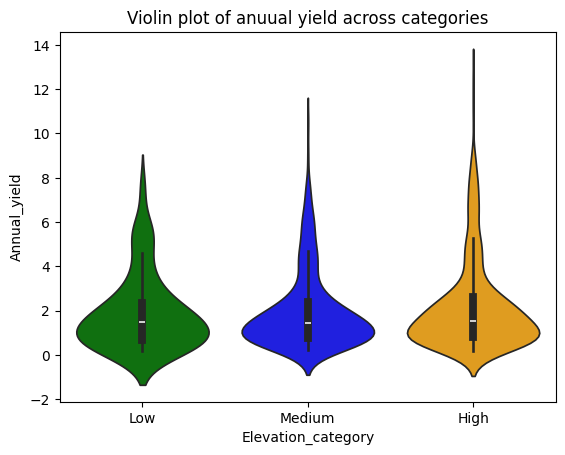

In [40]:
import pandas as pd
import requests
from io import StringIO
import seaborn as sns
import matplotlib.pyplot as plt

df['Elevation_category'] = pd.cut(df['Elevation'],
                                  bins = [-float('inf'), 300, 600, float('inf')],
                                  labels = ['Low', 'Medium', 'High'], right = False)

#Create the violin plot

sns.violinplot(data= df,
               x = 'Elevation_category',
               y='Annual_yield',
               hue='Elevation_category',
               palette={'Low': 'green', 'Medium': 'blue', 'High': 'orange'},
               legend=False
               )

               #)  # Assign colors to categories

plt.title('Violin plot of anuual yield across categories')
plt.xlabel('Elevation_category')
plt.ylabel('Annual_yield')

plt.show()


#Explanation
The narrower green violin plot for 'Low' elevation suggests less variability in annual yields compared to the broader blue and orange violins for 'Medium' and 'High' elevations, respectively.

The 'Low' elevation category shows a more consistent yield distribution with less variability compared to the 'Medium' and 'High' categories. This could indicate that lower elevations provide stable conditions for consistent agricultural output.

13. Assuming each 'Crop_type' contributes an integer value equal to its length (e.g., 'wheat' contributes 5), write a recursive function to sum the integer values for each unique crop type in the dataset. What is the sum?

In [50]:
crop_types = df['Crop_type'].drop_duplicates().tolist()

def sum_crop_lengths(crops, index=0):

    if index == len(crops):

        return 0

    else:

        return len(crops[index]) + sum_crop_lengths(crops, index + 1)



total_length = sum_crop_lengths(crop_types)

print(total_length)

42


14. Write Python code to perform a t-test comparing the average 'Annual_yield' between 'coffee' and 'banana' crop types using scipy.stats. What is the p-value, rounded to three decimal places?

In [52]:
import pandas as pd
import requests
from scipy import stats

coffee_yield = df[df['Crop_type'] == 'coffee']['Annual_yield']

banana_yield = df[df['Crop_type'] == 'banana']['Annual_yield']

t_stat, p_value = stats.ttest_ind(coffee_yield, banana_yield)

print(round(p_value, 3))

0.598
